## Simply supported beam under uniformly distributed loading

Consider a simply supported beam of length, L under the action of uniformly distributed loading $q$ in the downward direction.


The *Governing Differential Equations* are-
\begin{equation}
    EI\frac{d^3 \phi}{dx^3} = q \\
    \frac{dw}{dx} = \phi - \frac{EI}{GAK} \frac{d^2 \phi}{dx^2}
\end{equation}

The *Boundary Conditions* are-

At $x=0$ and $x=L$, $w=0$ and $M_x=0$.
       
<br>
Also we know, $M_x = EI\frac{d\phi}{dx}$. So, we can say that at $x=0$ and $x=L$, $\frac{d \phi}{dx}=0$.

In [1]:
import sympy as sp
from IPython.display import Math

E, I, q, G, A, K, L = sp.symbols('E I q G A kappa L')
x = sp.Symbol('x')
w = sp.Function('w')(x)
phi = sp.Function('phi')(x)

In [2]:
gde1 = sp.Eq(E*I*sp.diff(phi,x,3),q)
gde2 = sp.Eq(sp.diff(w,x),phi-(E*I/G/A/K)*sp.diff(phi,x,2))

display(Math(r' {}'.format(sp.latex(gde1))))
display(Math(r' {}'.format(sp.latex(gde2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solving the above 2 differential equations, we find the solution for w and $\phi$ in terms of arbitrary constants $C_1, \: C_2, \: C_3 \: and \: C_4$.

In [3]:
phi_sol = sp.dsolve(gde1,phi).rhs

display(Math(r'\phi(x) = {}'.format(sp.latex(phi_sol))))

<IPython.core.display.Math object>

In [4]:
C1, C2, C3, C4 = sp.symbols('C_1 C_2 C_3 C_4')

phi_sol = C1 + C2*x + C3*x**2 + q*x**3/(6*E*I)

gde2_mod = sp.Eq(gde2.lhs,gde2.rhs.subs(phi,phi_sol).doit())

gde2_mod

Eq(Derivative(w(x), x), C_1 + C_2*x + C_3*x**2 + q*x**3/(6*E*I) - E*I*(2*C_3 + q*x/(E*I))/(A*G*kappa))

In [5]:
w_sol = C1*x + C2/2*x**2 + C3/3*x**3 + q*x**4/(24*E*I) - 2*C3*E*I*x/(G*A*K) - q*x**2/(2*G*A*K) + C4

display(Math(r'w(x) = {}'.format(sp.latex(w_sol))))

<IPython.core.display.Math object>

We will now use the boundary conditions to find values of the arbitrary constants.

**Boundary Condition 1**: At $x=0$, $w=0$.

In [6]:
bc1 = sp.Eq(w_sol.subs(x,0),0)

display(Math(r'{}'.format(sp.latex(bc1))))

<IPython.core.display.Math object>

In [7]:
w_sol = w_sol.subs(C4,0)

display(Math(r'w(x) = {}'.format(sp.latex(w_sol))))

<IPython.core.display.Math object>

**Boundary Condition 2**: At $x=0$, $\frac{d \phi}{dx}=0$.

In [8]:
bc2 = sp.Eq(sp.diff(phi_sol,x).subs(x,0),0)

display(Math(r'{}'.format(sp.latex(bc2))))

<IPython.core.display.Math object>

In [9]:
phi_sol = phi_sol.subs(C2,0)
w_sol   = w_sol.subs(C2,0)

display(Math(r'\phi(x) = {}'.format(sp.latex(phi_sol))))
display(Math(r'w(x) = {}'.format(sp.latex(w_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Boundary Condition 3**: At $x=L$, $w=0$.

In [10]:
bc3 = sp.Eq(w_sol.subs(x,L),0)

display(Math(r'{}'.format(sp.latex(bc3))))

<IPython.core.display.Math object>

**Boundary Condition 4**: At $x=L$, $\frac{d \phi}{dx}=0$.

In [11]:
bc4 = sp.Eq(sp.diff(phi_sol,x).subs(x,L),0)

display(Math(r'{}'.format(sp.latex(bc4))))

<IPython.core.display.Math object>

In [12]:
C3_sol = sp.solve(bc4,C3)[0]

display(Math(r'C_3 = {}'.format(sp.latex(C3_sol))))

<IPython.core.display.Math object>

In [13]:
bc3_simp = bc3.subs(C3,C3_sol).simplify()

display(Math(r'{}'.format(sp.latex(bc3_simp))))

<IPython.core.display.Math object>

In [14]:
C1_sol = sp.solve(bc3_simp,C1)[0]

display(Math(r'C_1 = {}'.format(sp.latex(C1_sol))))

<IPython.core.display.Math object>

Substituting the value of the constants, we find the value of w(x) and $\phi(x)$.

In [15]:
phi_sol = phi_sol.subs([(C1,C1_sol),(C2,0),(C3,C3_sol),(C4,0)])
w_sol = w_sol.subs([(C1,C1_sol),(C2,0),(C3,C3_sol),(C4,0)])

display(Math(r'\phi(x) = {}'.format(sp.latex(phi_sol))))
display(Math(r'w(x) = {}'.format(sp.latex(w_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Thus, we found out the deflection of the *Timoshenko beam* under uniform loading.

\begin{equation}
    w(x) = \frac{qxL^3}{24EI} \left( 1 - 2(\frac{x}{L})^2 + (\frac{x}{L})^3 \right) + \frac{qxL}{2GA \kappa}\left(1 - \frac{x}{L}\right)
\end{equation}

We can compare with the *Euler-Bernoulli beam* theory.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

q = 1
EI= 1/12
GAK=1/2

x = np.linspace(0,1,100)

w_timo = -q/(24*EI)*x*(1-2*x**2+x**3) - q*x/(2*GAK)*(1-x)
w_ebt  = -q/24*x*(1-2*x**2+x**3)

error = (np.sum(w_timo)-np.sum(w_ebt))/np.sum(w_timo) * 100;
print('Error = {0:.2f}%'.format(error))

Error = 96.87%


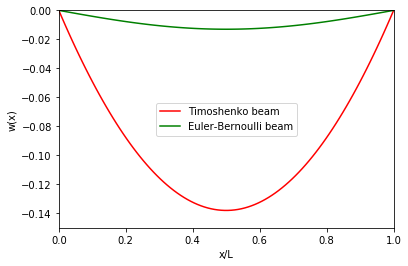

In [17]:
plt.plot(x,w_timo,'r',label='Timoshenko beam')
plt.plot(x,w_ebt,'g',label='Euler-Bernoulli beam')
plt.xlabel('x/L')
plt.ylabel('w(x)')
plt.xlim(0,1)
plt.ylim(-0.15,0)
plt.legend(loc='best')
plt.show()

Simlarly, we can work for other problems by changing the boundary conditions acordingly.